# Predict Mobile Phone Pricing

### Introduction


Mobile phones have become an indispensable part of daily life, with consumers increasingly relying on these devices for various personal and professional tasks. As the mobile phone market continues to evolve, manufacturers must determine optimal pricing strategies to stay competitive. Pricing decisions are influenced by a multitude of factors, including hardware specifications, software capabilities, and market trends. Consequently, accurately predicting mobile phone prices based on these features is of significant value to both consumers and manufacturers.

In this project, the objective is to develop a system that can predict the pricing range of mobile phones, categorizing them into low, medium, high, and very high cost based on their technical attributes. By leveraging machine learning (ML) techniques, this system can automate the pricing prediction process, enabling businesses to refine their pricing models and helping consumers make informed purchasing decisions.

The real-world application of this model is crucial in various contexts, such as e-commerce platforms, where pricing predictions can drive personalized recommendations, and for manufacturers looking to adjust their pricing based on changing market demands. Additionally, this system can be instrumental for mobile phone retailers and distributors, allowing them to predict the value of devices and optimize their sales strategies accordingly.

To address this problem, exploratory data analysis (EDA) was first performed to better understand the relationships between mobile phone attributes and their corresponding price ranges. Following this, multiple machine learning algorithms were applied to build a robust model capable of predicting mobile phone prices accurately. Feature selection and model tuning techniques were incorporated to ensure the highest performance.

Machine learning plays a critical role in solving this problem by uncovering complex patterns and relationships within large datasets. Unlike traditional statistical methods, ML can handle non-linear relationships, interactions between features, and large volumes of data, all of which are present in mobile phone pricing data. Through methods like regression, classification, and ensemble learning, ML models can learn from historical data to make accurate predictions, which is essential for industries that rely on fast and precise price determinations.



### Step 1 : Reading and Understamding the Data

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For handling warnings (optional but useful)
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("Downloads/mobile pricing_dataset.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.shape

(2000, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
print("\nDistribution of 'Price_range':")
print(data['price_range'].value_counts())


Distribution of 'Price_range':
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


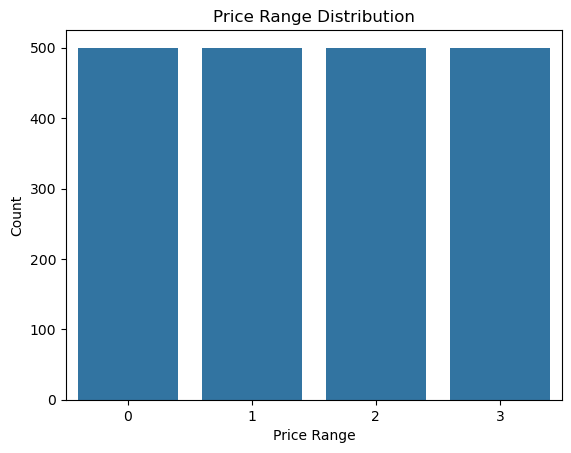

In [9]:
# Visualize the target variable distribution
sns.countplot(x='price_range', data=data)
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

#### Infernce from Dataset Analysis

The dataset provides data on various mobile phone features and their corresponding price range classifications. After conducting Exploratory Data Analysis (EDA), the following key observations can be made:

Data Structure: The dataset consists of 2,000 entries and 21 columns, including features such as battery power, screen dimensions, camera specifications, and connectivity options, with the target variable being price_range. The data types and absence of missing values across all columns suggest the dataset is clean and ready for modeling, which is important for ensuring the accuracy and efficiency of machine learning models.

Feature Diversity: The features in the dataset cover a wide range of mobile phone specifications, including both hardware (e.g., battery power, camera megapixels, RAM) and connectivity features (e.g., 4G, WiFi, dual SIM). This variety in features offers a comprehensive basis for predicting mobile phone price ranges.

Target Variable Distribution: The price_range target variable is evenly distributed, with 500 phones in each category (low, medium, high, and very high). This balanced distribution is advantageous for training classification models, as it reduces the risk of bias towards any specific price range. Models trained on this dataset will be less likely to favor one price range over another, making them more generalizable and effective for prediction.

Data Characteristics: Given that the price_range is a categorical variable with four classes, it presents a multi-class classification problem. The feature set seems suitable for predicting price ranges based on mobile specifications, and machine learning models can exploit these relationships to make informed predictions.

These findings suggest that the dataset is well-structured for the problem at hand, and the balanced target distribution will contribute positively to the performance of machine learning algorithms. The comprehensive feature set provides sufficient information for building an accurate price prediction system, which can have significant real-world applications in mobile retail, pricing strategies, and consumer decision-making.








### Step 2 : Exploratory Data Analysis

In [10]:
# Separate features (X) and target variable (y)
X = data.drop('price_range', axis=1)
y = data['price_range']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
# Exclude binary features from the numerical features list
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
numerical_features_excluding_binary = [feature for feature in numerical_features if feature not in binary_features]


In [11]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check for outliers in all numerical features (excluding binary features)
outliers_summary = {}
for feature in numerical_features_excluding_binary:
    outliers = detect_outliers_iqr(X, feature)
    outliers_summary[feature] = len(outliers)

# Display the number of outliers for each feature
for feature, count in outliers_summary.items():
    print(f"Feature '{feature}' has {count} outliers.")


Feature 'battery_power' has 0 outliers.
Feature 'clock_speed' has 0 outliers.
Feature 'fc' has 18 outliers.
Feature 'int_memory' has 0 outliers.
Feature 'm_dep' has 0 outliers.
Feature 'mobile_wt' has 0 outliers.
Feature 'n_cores' has 0 outliers.
Feature 'pc' has 0 outliers.
Feature 'px_height' has 2 outliers.
Feature 'px_width' has 0 outliers.
Feature 'ram' has 0 outliers.
Feature 'sc_h' has 0 outliers.
Feature 'sc_w' has 0 outliers.
Feature 'talk_time' has 0 outliers.


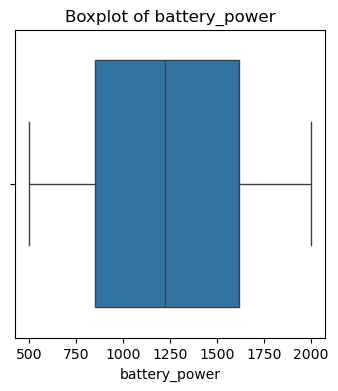

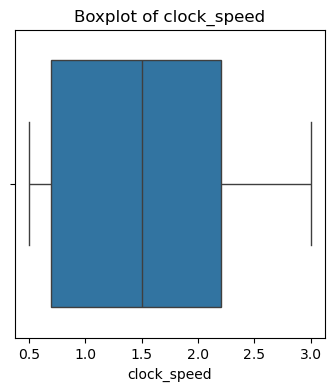

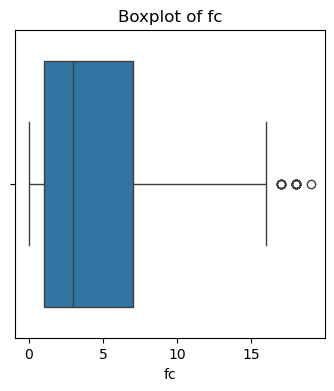

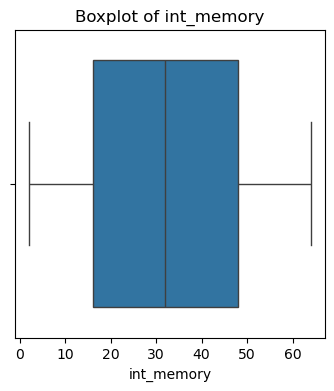

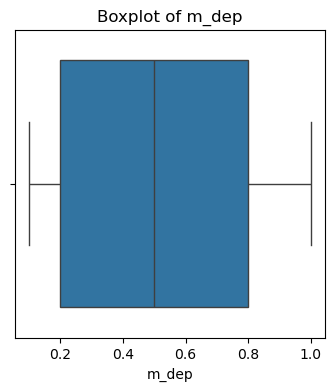

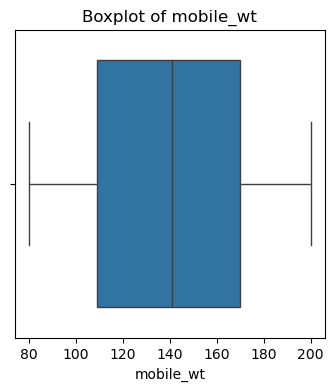

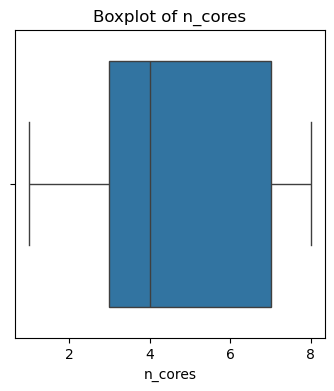

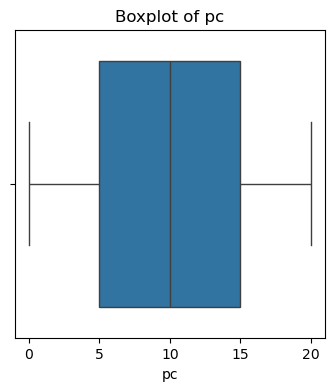

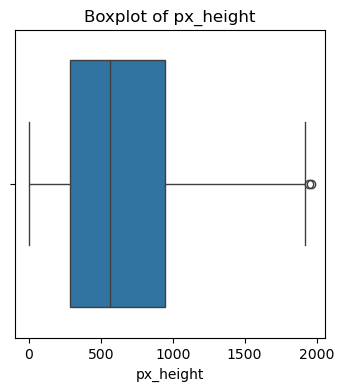

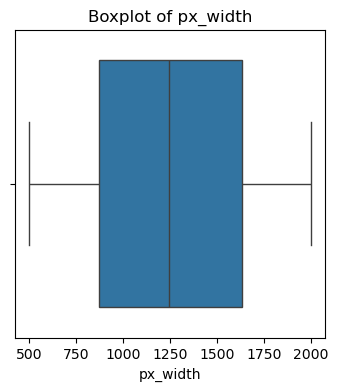

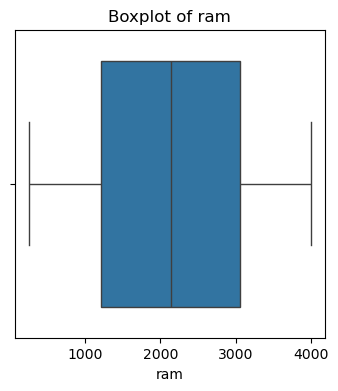

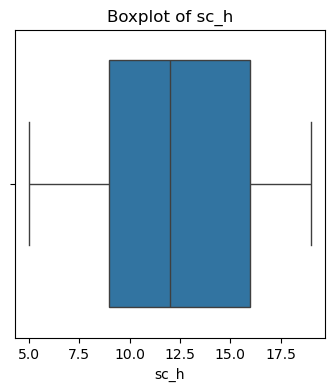

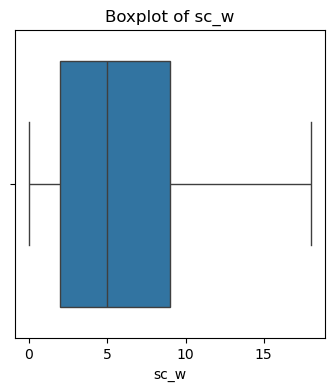

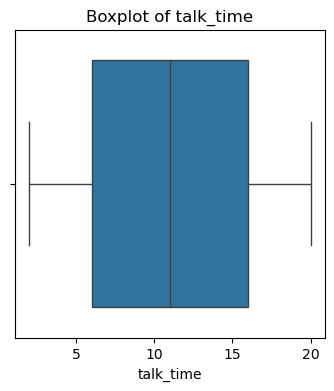

In [12]:
# Visualize outliers with boxplots
for feature in numerical_features_excluding_binary:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=X[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

Outlier detection using the IQR method showed that most numerical features, such as battery power, clock speed, and mobile weight, have no significant outliers, indicating consistent data. However, features like fc (front camera megapixels) and px_height (pixel resolution height) displayed a few outliers. These represent high-end mobile phones with advanced features, which are possible in real-world scenarios. Since the number of outliers is minimal and they reflect genuine variations, they were retained to preserve the integrity and diversity of the dataset, ensuring the model can learn from premium device specifications effectively.

##### Numerical columns Analysis

In [14]:

# Display summary statistics for numerical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
print("Summary Statistics for Numerical Columns:")
print(X[numerical_features].describe())


Summary Statistics for Numerical Columns:
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.28783

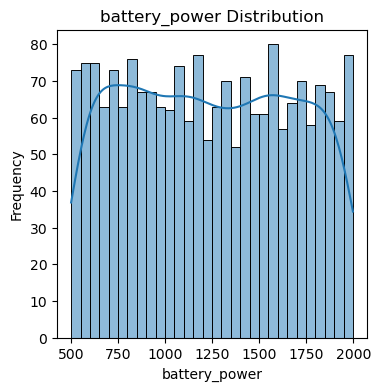

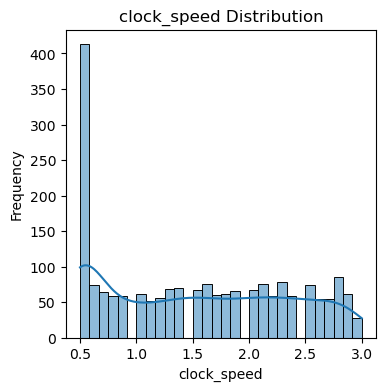

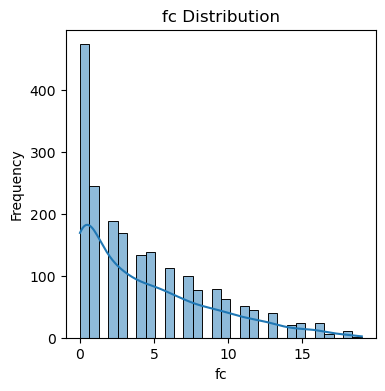

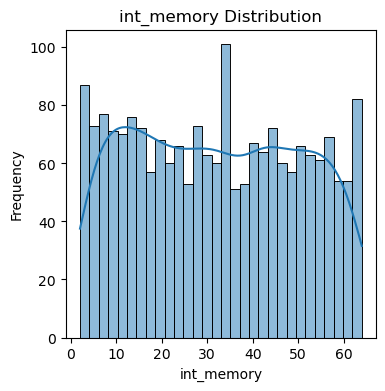

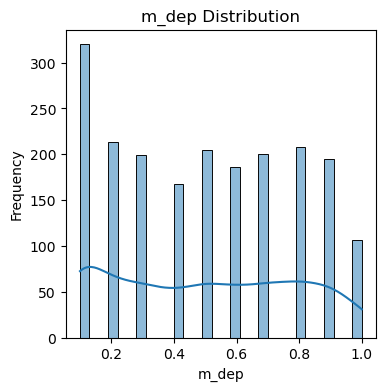

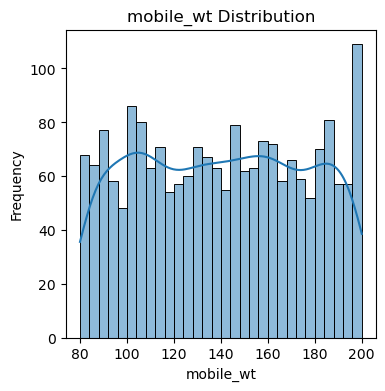

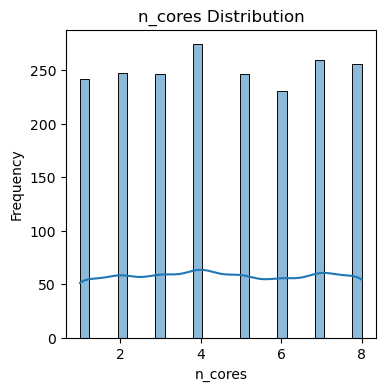

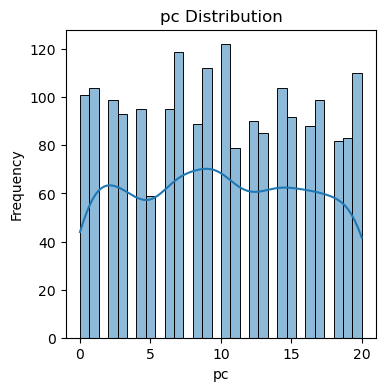

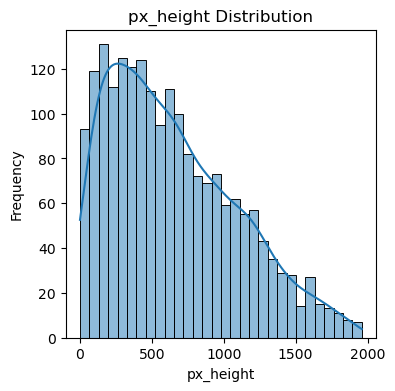

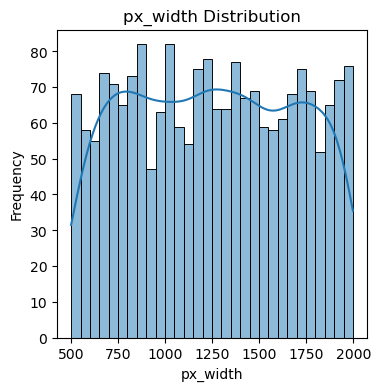

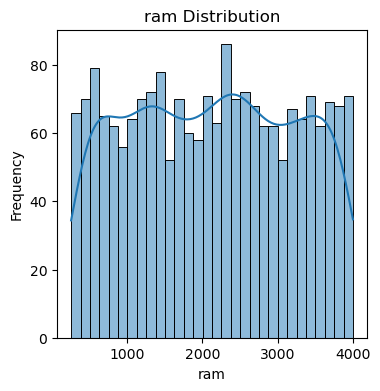

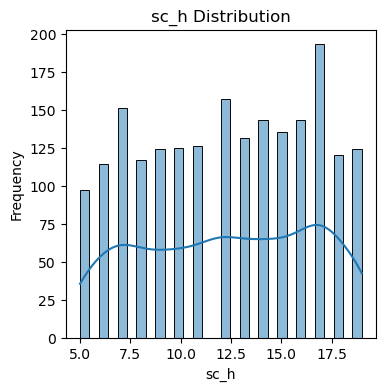

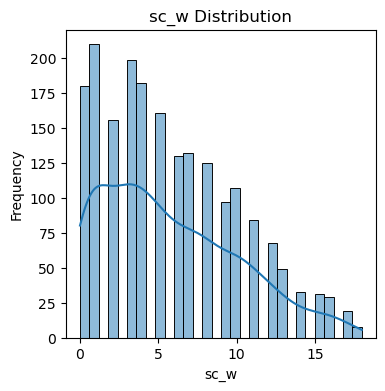

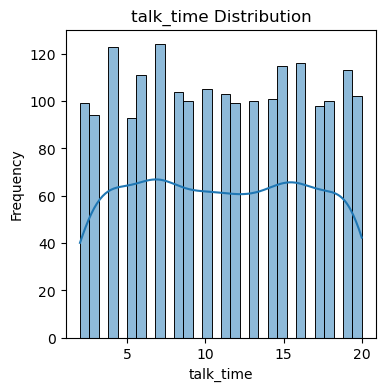

In [15]:

# Visualize the distribution of numerical features (excluding binary variables)
for feature in numerical_features_excluding_binary:
    plt.figure(figsize=(4, 4))
    sns.histplot(X[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


1. Battery Power (battery_power):
- Distribution is fairly even with peaks around 750, 1500, and 2000.
- Indicates a diverse range of devices with no single dominant battery power.
  
2. Clock Speed (clock_speed):
- Right-skewed distribution with most values concentrated at lower speeds (around 0.5 GHz).
- A few outliers with higher clock speeds.
  
3. Front Camera (fc):
- Heavily right-skewed, with most devices having low or zero front camera resolution.
- Few devices have significantly higher values.
  
4. Internal Memory (int_memory):
- Distribution is relatively uniform with slight peaks at specific memory sizes like 30-35.
- Indicates diverse internal memory sizes without strong dominance by one range.
  
5. Mobile Depth (m_dep):
- Multimodal distribution with clusters around specific depths like 0.1, 0.5, and 0.9.
- Suggests variability in device thickness.
  
6. Mobile Weight (mobile_wt):
- Mostly uniform distribution with minor peaks around 100, 150, and 190.
- Indicates a wide range of device weights.
  
7. Number of Cores (n_cores):
- Fairly uniform distribution, with a slight peak at 4 cores.
- Devices with varying core counts are equally represented.
  
8. Primary Camera (pc):
- Multimodal distribution with clusters at 2, 8, 10, and 20.
- Suggests variation in primary camera resolutions.

9. Pixel Height (px_height):
- Right-skewed distribution, with most devices having smaller pixel heights around 200-300.
- Few devices have larger pixel heights, forming a long tail.

Many features of mobile phones show interesting patterns. For instance, some features like clock speed, front camera resolution, and screen pixel height tend to have lower values more often, meaning most phones are built with modest specifications in these areas. Other features, like internal memory, phone weight, and primary camera resolution, show a mix of values with certain sizes or weights being more common. Additionally, some features, such as the number of processor cores, show clear preferences, like many phones having 4 cores. These patterns give us a better understanding of how phone specifications vary and what’s popular among manufacturers. This knowledge can help predict phone prices or understand market trends more effectively.

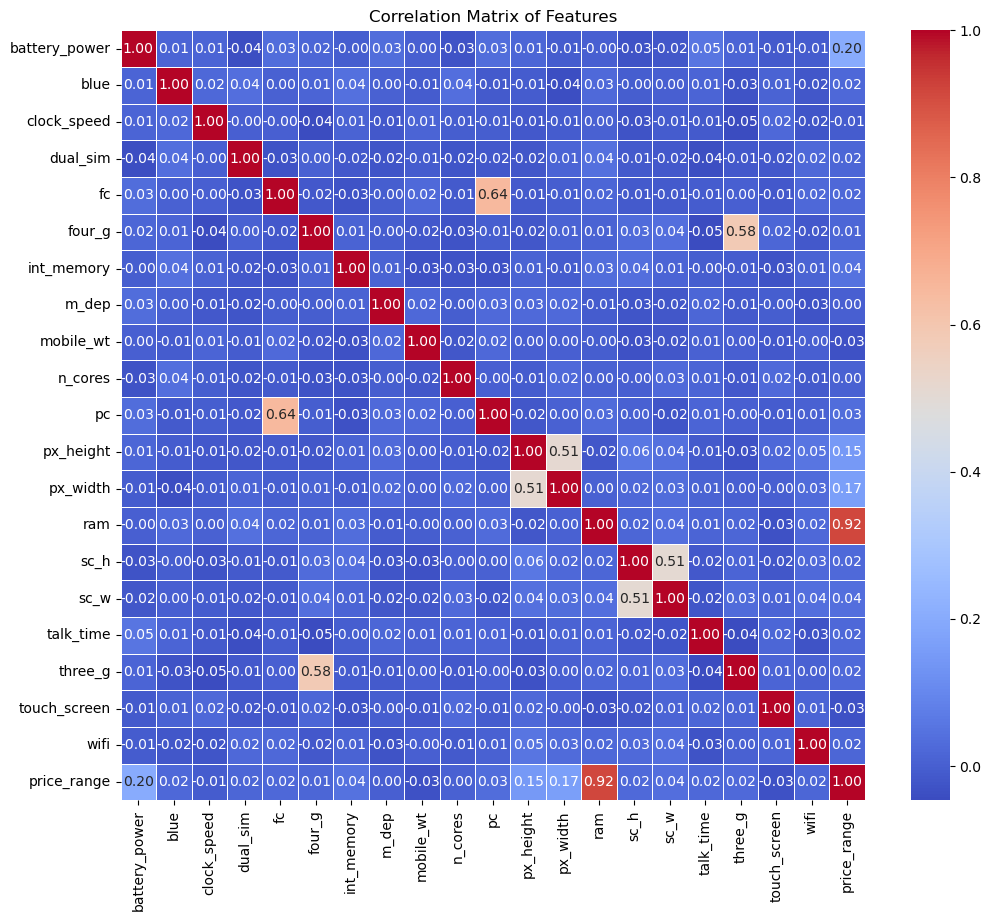

Correlation of Features with 'price_range':

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


In [17]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlations with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Sort features by their correlation with 'price_range'
correlation_with_target = correlation_matrix['price_range'].sort_values(ascending=False)
print("Correlation of Features with 'price_range':\n")
print(correlation_with_target)

The most important feature affecting the price range of a mobile phone is its RAM—phones with more RAM are usually more expensive. Features like battery power and screen resolution also have some impact, as better specs in these areas are linked to higher prices. However, some features, like touch screen or 3G/4G support, don’t influence the price much, likely because they’re standard in most phones. While weaker features may not matter much on their own, they could still help when combined with other features to improve predictions. This helps in choosing which features to focus on for better model accuracy.

## Step 3 : Feature Scaling

In [20]:
# Features to scale (excluding target variable and binary features)
features_to_scale = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
                     'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 
                     'ram', 'sc_h', 'sc_w', 'talk_time']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data_scaled = data.copy()  # Create a copy of the original data
data_scaled[features_to_scale] = scaler.fit_transform(data[features_to_scale])


### Step 4 : Data Splittig

#### Train-test split

In [22]:
# Define features (X) and target (y)
X = data_scaled.drop(columns=['price_range'])
y = data_scaled['price_range']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shapes
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (1400, 20)
Testing features shape: (600, 20)
Training target shape: (1400,)
Testing target shape: (600,)


### Step 5 : Model Building 

#### Model 1 : Logistic regression 

In [24]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=500)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)


In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9617

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.95      0.96      0.95       150
           2       0.95      0.93      0.94       150
           3       0.95      0.99      0.97       150

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600


Confusion Matrix:
[[145   5   0   0]
 [  1 144   5   0]
 [  0   3 140   7]
 [  0   0   2 148]]


feature selction for logistic regression

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=500)

# Perform RFE for feature selection
selector = RFE(log_reg, n_features_to_select=10)  
X_rfe = selector.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]
print(f"Selected Features: {selected_features}")

# Train the model with selected features
log_reg.fit(X_rfe, y_train)

# Predict and evaluate the model
y_pred_rfe = log_reg.predict(selector.transform(X_test))
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy after RFE: {accuracy_rfe:.4f}")


Selected Features: Index(['battery_power', 'dual_sim', 'four_g', 'int_memory', 'mobile_wt',
       'px_height', 'px_width', 'ram', 'sc_h', 'wifi'],
      dtype='object')
Accuracy after RFE: 0.9767


In [28]:
# Calculate accuracy
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy after RFE: {accuracy_rfe:.4f}")

# Generate the classification report
print("\nClassification Report: Logistic Regression After RFE")
print(classification_report(y_test, y_pred_rfe))

# Generate the confusion matrix
cm_rfe = confusion_matrix(y_test, y_pred_rfe)
print("\nConfusion Matrix:Logistic Regression After RFE")
print(cm_rfe)

Accuracy after RFE: 0.9767

Classification Report: Logistic Regression After RFE
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       150
           1       0.95      0.98      0.97       150
           2       0.97      0.96      0.97       150
           3       0.99      0.99      0.99       150

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600


Confusion Matrix:Logistic Regression After RFE
[[147   3   0   0]
 [  1 147   2   0]
 [  0   4 144   2]
 [  0   0   2 148]]


ROC Curve For LR model

Class 0 AUC: 1.00
Class 1 AUC: 1.00
Class 2 AUC: 1.00
Class 3 AUC: 1.00


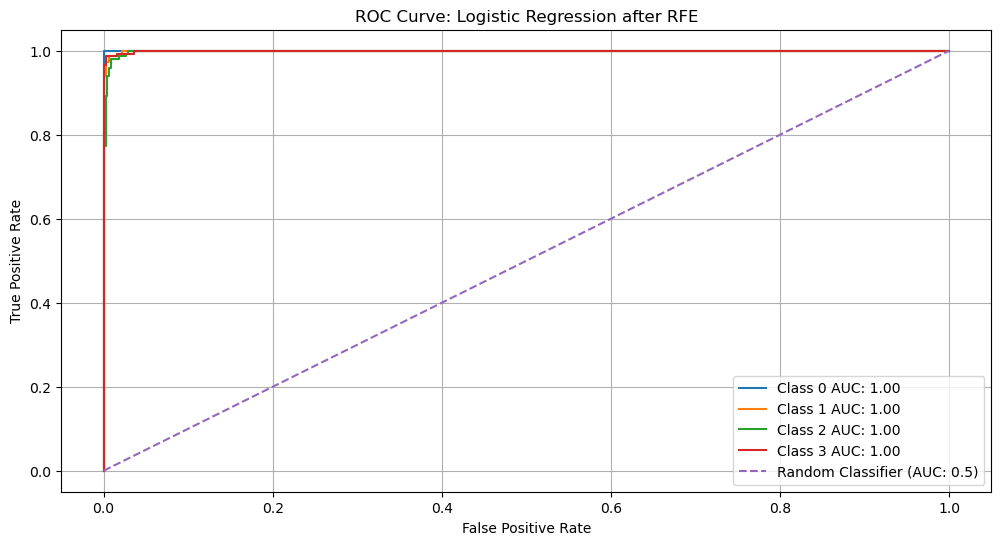

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Train the LogisticRegression model
lr = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary for convergence
lr.fit(X_train_rfe, y_train)  # Ensure X_train_rfe and y_train are your training data

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

# Predict probabilities for the ROC curve
y_pred_prob = lr.predict_proba(X_test_rfe)

# Initialize a plot
plt.figure(figsize=(12, 6))

# Loop through each class to calculate and plot the ROC curve
for i in range(y_test_binarized.shape[1]):
    # Compute ROC curve and AUC for Logistic Regression after RFE
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    
    # Print the ROC AUC score for each class
    print(f"Class {i} AUC: {auc_score:.2f}")
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f"Class {i} AUC: {auc_score:.2f}")

# Plot the random classifier (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier (AUC: 0.5)")

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression after RFE')
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()


Cross validation for LR model

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(random_state=42, max_iter=500)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)  # X = features, y = target

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std():.4f}")


Cross-validation scores: [0.96   0.955  0.9675 0.965  0.97  ]
Mean cross-validation score: 0.9635
Standard deviation of cross-validation scores: 0.0054


#### Inference Based on Metrics: Logistic Regression

1. Accuracy Score:
- Initial Logistic Regression: Achieved an accuracy of 96.17%, indicating strong overall performance.
- After RFE (Feature Selection): Accuracy improved to 97.67%, showing that selecting the top 10 most relevant features enhanced the model's performance.
  
2. Confusion Matrix:
- Initial Model:The matrix shows minimal misclassifications across all price ranges.
For example, only 5 instances of Class 0 were misclassified as Class 1.
- After RFE:Misclassifications reduced further (e.g., only 3 instances of Class 0 misclassified).
This indicates better class separation and a stronger predictive capability after feature selection.

3. ROC Curve and AUC:
- The ROC curves for all classes yielded an AUC of 1.00, indicating perfect separability between classes.
- This reflects that the model is highly effective at distinguishing between different price ranges.
  
4. Cross-Validation:
- Mean Accuracy: 96.35%, with a very low standard deviation (0.0054), confirming the model’s consistency and robustness across different splits of the dataset.
- The low variance suggests that the model is not overfitting and generalizes well.

  Logistic Regression (LR) is a simple yet powerful method to predict categories, like phone price ranges, based on features such as RAM and battery power. It works by finding patterns in the data and assigning probabilities to each category. In this case, after selecting the most important features, the model became even more accurate, correctly predicting price ranges most of the time. 


#### Model 2 - Randomforest

In [45]:

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
# Predictions
y_pred = rf.predict(X_test)

In [51]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.4f}")

print("\nClassification Report: Random forest")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix: Random Forest")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8717

Classification Report: Random forest
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       150
           1       0.84      0.88      0.86       150
           2       0.83      0.73      0.78       150
           3       0.87      0.92      0.89       150

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600


Confusion Matrix: Random Forest
[[143   7   0   0]
 [  7 132  11   0]
 [  0  19 110  21]
 [  0   0  12 138]]


Hyperparameter tunning for Random Forest

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                # Maximum depth of trees
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],      # Number of features to consider for the best split
    'bootstrap': [True, False]                      # Whether bootstrap samples are used when building trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters from grid search
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the tuned model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy after Hyperparameter Tuning: {accuracy_best_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy after Hyperparameter Tuning: 0.8767

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       150
           1       0.83      0.86      0.84       150
           2       0.81      0.76      0.79       150
           3       0.90      0.93      0.92       150

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600


Confusion Matrix:
[[143   7   0   0]
 [  5 129  16   0]
 [  0  20 114  16]
 [  0   0  10 140]]


Feature selection for Random forest

In [54]:
# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# Apply RFE with Random Forest
selector_rfe = RFE(rf, n_features_to_select=10)  # Select top 10 features
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
X_test_rfe = selector_rfe.transform(X_test)

# Get the selected feature columns
selected_features_rfe = X_train.columns[selector_rfe.support_]
print(f"Selected Features using RFE: {selected_features_rfe}")

Selected Features using RFE: Index(['battery_power', 'int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')


In [55]:
# Train the Random Forest model using the selected features
rf.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred_rfe = rf.predict(X_test_rfe)

# Evaluate the model
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print(f"Accuracy after RFE: {accuracy_rfe:.4f}")

# Classification report
print("\nClassification Report: Random forest after RFE")
print(classification_report(y_test, y_pred_rfe))

# Confusion matrix
print("\nConfusion Matrix: Random forest after RFE")
print(confusion_matrix(y_test, y_pred_rfe))


Accuracy after RFE: 0.9117

Classification Report: Random forest after RFE
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       150
           1       0.89      0.88      0.88       150
           2       0.84      0.86      0.85       150
           3       0.95      0.93      0.94       150

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600


Confusion Matrix: Random forest after RFE
[[147   3   0   0]
 [  5 132  13   0]
 [  0  14 129   7]
 [  0   0  11 139]]


ROC curve for Random Forest

Class 0 AUC: 1.00
Class 1 AUC: 0.98
Class 2 AUC: 0.97
Class 3 AUC: 1.00


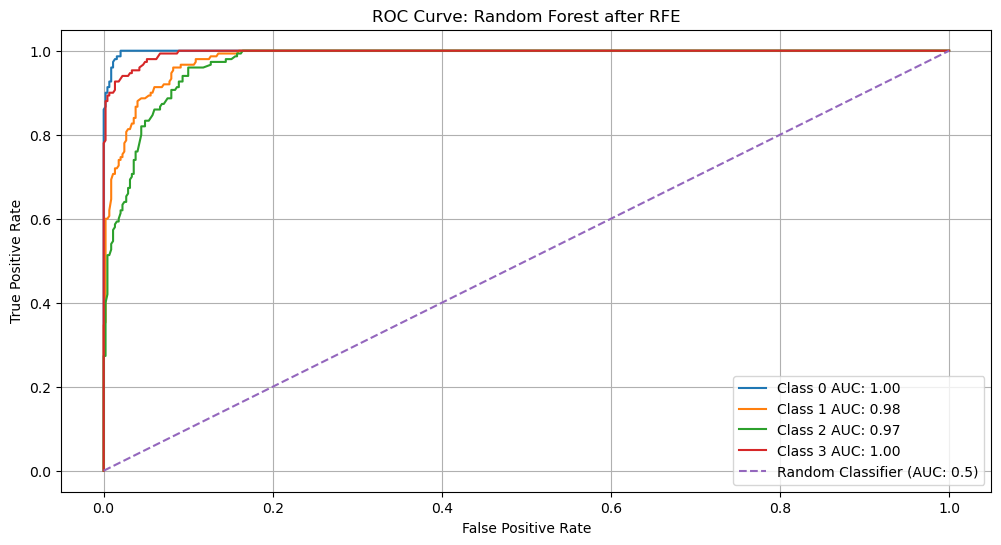

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])

# Predict probabilities for the ROC curve
y_pred_prob = rf.predict_proba(X_test_rfe)

# Initialize a plot
plt.figure(figsize=(12, 6))

# Loop through each class to calculate and plot the ROC curve
for i in range(y_test_binarized.shape[1]):
    # Compute ROC curve and AUC for Random Forest after RFE
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    
    # Print the ROC AUC score for each class
    print(f"Class {i} AUC: {auc_score:.2f}")
    
    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label=f"Class {i} AUC: {auc_score:.2f}")

# Plot the random classifier (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier (AUC: 0.5)")

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest after RFE')
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()


#### Infernce Based on Matrics : Random Forest

1. Accuracy:
- Initial Model: The Random Forest model initially achieved an accuracy of 87.17%, indicating that it performed reasonably well but not as well as the logistic regression model.
- After Hyperparameter Tuning: The model's accuracy slightly increased to 87.67% after hyperparameter optimization. The small increase suggests that the base model was already performing well but benefited from fine-tuning.
- After RFE (Feature Selection): With selected features, the accuracy increased to 91.17%, showing that reducing the number of features improved model performance by focusing on the most important variables.
  
2. Classification Report:
- The precision, recall, and F1-score values indicate the model's ability to classify mobile phones correctly across all price categories. The high F1-scores (close to 1 for most classes) show that the Random Forest model is reliable in distinguishing between price ranges.
- The precision for Class 1 and Class 2 (middle price ranges) is lower than for other classes, reflecting that the model struggled a bit more to correctly classify those categories compared to the lowest and highest price categories.
  
3. Confusion Matrix:
- The confusion matrix reveals that the model generally performs well, with only a few misclassifications (such as Class 1 being confused with Class 2 or Class 0). This is common in multiclass classification tasks and can be further improved with better feature engineering or model adjustments.
  
4. ROC Curve & AUC:
- The AUC (Area Under the Curve) for each class is close to 1 for most categories, indicating that the Random Forest model is excellent at distinguishing between the different mobile price ranges. Class 1 (mid-range price) has a slightly lower AUC (0.98), suggesting that this category is more challenging to classify.

Random Forest (RF) is a machine learning method that uses many decision trees to make predictions. Each tree looks at different pieces of information (like battery power, memory, etc.) and gives a vote on what the price category of a phone might be. The Random Forest combines these votes to make a final decision.

In this case, Random Forest is good at predicting mobile phone price categories because it can handle lots of different factors, works well with both simple and complex data, and improves its accuracy by selecting the most important features (like battery life or RAM). After fine-tuning, it became even better at classifying phones into price ranges, making it a reliable tool for the problem at hand.

#### Model 3 - XGboost 

In [69]:


# Initialize XGBoost model
xgb = XGBClassifier(random_state=42, n_estimators=300)

# Train the model
xgb.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test_rfe)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy after XGBoost: {accuracy_xgb:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Accuracy after XGBoost: 0.9250

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.92      0.91      0.91       150
           2       0.86      0.91      0.88       150
           3       0.95      0.92      0.94       150

    accuracy                           0.93       600
   macro avg       0.93      0.92      0.93       600
weighted avg       0.93      0.93      0.93       600


Confusion Matrix:
[[145   5   0   0]
 [  4 136  10   0]
 [  0   7 136   7]
 [  0   0  12 138]]


Hyperparameter tunning for XGBoost

In [71]:
# Initialize the XGBoost model
xgb = XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_rfe, y_train)

# Best parameters from GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train the best model
best_xgb = grid_search.best_estimator_

# Predict on the test set
y_pred_best_xgb = best_xgb.predict(X_test_rfe)

# Evaluate the model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"Accuracy after Hyperparameter Tuning: {accuracy_best_xgb:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_xgb))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Accuracy after Hyperparameter Tuning: 0.9300

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       150
           1       0.91      0.92      0.91       150
           2       0.88      0.89      0.88       150
           3       0.96      0.93      0.95       150

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600


Confusion Matrix:
[[147   3   0   0]
 [  4 138   8   0]
 [  0  11 133   6]
 [  0   0  10 140]]


RFE for XGBoost

In [72]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    colsample_bytree=0.9, 
    gamma=0.2, 
    learning_rate=0.1, 
    max_depth=3, 
    n_estimators=300, 
    subsample=0.7,
    random_state=42
)

# Apply RFE for feature selection
selector_rfe = RFE(estimator=xgb_model, n_features_to_select=10)  # Select top 10 features
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
X_test_rfe = selector_rfe.transform(X_test)

# Get the selected feature columns
selected_features_rfe = X_train.columns[selector_rfe.support_]
print(f"Selected Features using RFE: {selected_features_rfe}")

# Train the XGBoost model with the selected features
xgb_model.fit(X_train_rfe, y_train)

# Predict on the test set
y_pred_xgb_rfe = xgb_model.predict(X_test_rfe)

# Calculate accuracy
accuracy_xgb_rfe = accuracy_score(y_test, y_pred_xgb_rfe)
print(f"Accuracy after RFE and XGBoost: {accuracy_xgb_rfe:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_rfe))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_rfe))


Selected Features using RFE: Index(['battery_power', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
       'px_height', 'px_width', 'ram', 'sc_h', 'touch_screen'],
      dtype='object')
Accuracy after RFE and XGBoost: 0.9417

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       150
           1       0.93      0.95      0.94       150
           2       0.90      0.90      0.90       150
           3       0.95      0.94      0.94       150

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600


Confusion Matrix:
[[147   3   0   0]
 [  2 142   6   0]
 [  0   7 135   8]
 [  0   0   9 141]]


ROC Curve for XGBoost

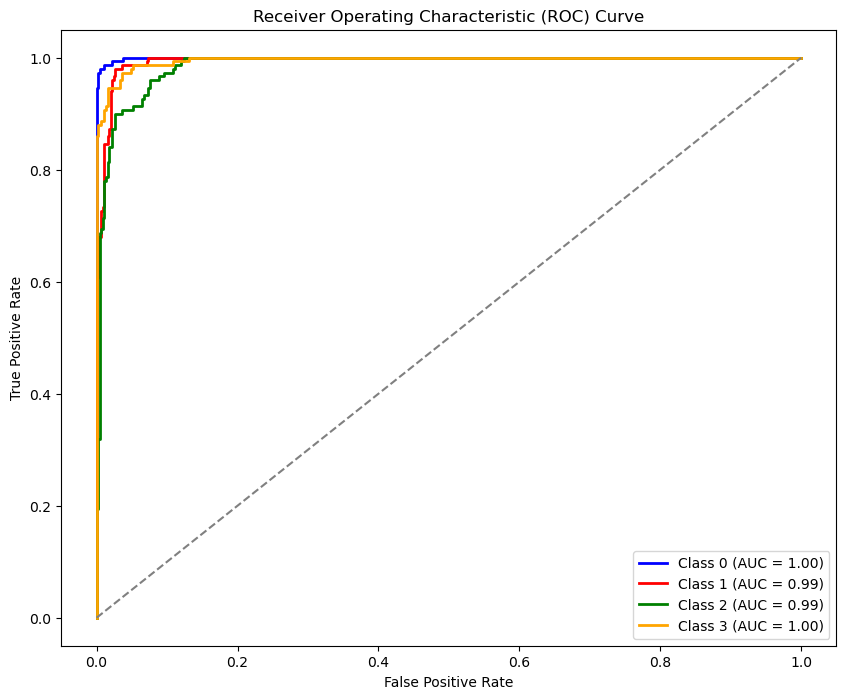

Class 0 AUC: 1.00
Class 1 AUC: 0.99
Class 2 AUC: 0.99
Class 3 AUC: 1.00


In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.preprocessing import label_binarize

# Binarize the output labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_pred_prob = xgb_model.predict_proba(X_test_rfe)

# Number of classes
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for all classes
plt.figure(figsize=(10, 8))

colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show plot
plt.show()

# Print AUC values for each class
for i in range(n_classes):
    print(f"Class {i} AUC: {roc_auc[i]:.2f}")


#### Inference Based On Metrics : XGboost

1. High Accuracy:
The model achieves an accuracy of 94.17% after RFE, making it highly reliable for predicting price categories based on features like RAM, battery power, and screen size. This is critical for businesses needing precise categorization.

2. Selected Features:
Using RFE, the model focuses on the top 10 features most relevant to price prediction (e.g., RAM, pixel resolution). This simplifies the model and ensures it prioritizes meaningful attributes.

3. AUC Performance:
The AUC values for all classes (low, medium, high, very high) are near perfect (0.99–1.00), indicating the model is excellent at distinguishing between price categories. This is crucial for minimizing misclassification, especially for products at price boundaries.

4. Balanced Classification:
The classification report and confusion matrix reveal that the model performs well across all categories, with high precision, recall, and F1-scores. This ensures fairness and reliability in predictions.

XGBoost is a powerful machine learning algorithm designed to handle complex datasets and make accurate predictions. It works like a decision-making system, breaking down the problem into smaller parts and learning from its mistakes to improve over time. For our problem of predicting mobile phone price categories, XGBoost is especially useful because it can focus on the most important features, like RAM, battery life, and screen size, to make precise predictions. It’s fast, efficient, and works well with large datasets, making it perfect for analyzing many phone features at once. With its ability to deliver high accuracy and excellent performance in separating price categories, XGBoost ensures that our predictions are reliable and practical for real-world applications.

#### Model 4 : SVM

In [78]:


# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy after SVM: {accuracy_svm:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Accuracy after SVM: 0.8883

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       150
           1       0.88      0.86      0.87       150
           2       0.79      0.85      0.82       150
           3       0.92      0.89      0.91       150

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600


Confusion Matrix:
[[143   7   0   0]
 [  3 129  18   0]
 [  0  11 127  12]
 [  0   0  16 134]]


Hyperparameter tunning for SVM

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the model
svm_model = SVC(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict with the best model
best_svm_model = grid_search.best_estimator_

# Evaluate the model
y_pred_svm = best_svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy after Hyperparameter Tuning: {accuracy_svm:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy after Hyperparameter Tuning: 0.9750

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.95      0.97      0.96       150
           2       0.97      0.97      0.97       150
           3       0.99      0.99      0.99       150

    accuracy                           0.97       600
   macro avg       0.98      0.97      0.98       600
weighted avg       0.98      0.97      0.98       600


Confusion Matrix:
[[146   4   0   0]
 [  1 145   4   0]
 [  0   3 145   2]
 [  0   0   1 149]]


ROC Curve for SVM

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


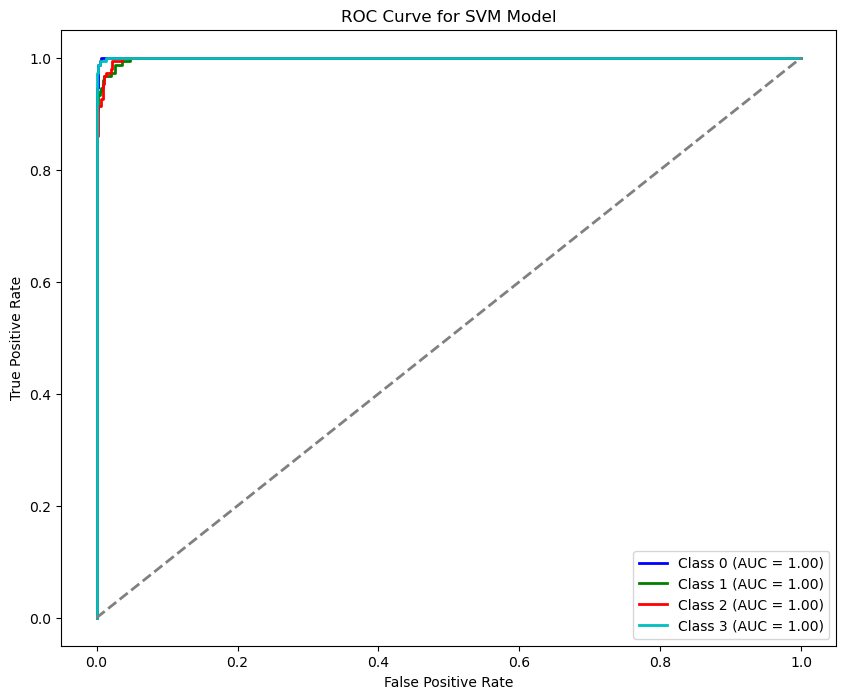

Class 0 AUC: 1.00
Class 1 AUC: 1.00
Class 2 AUC: 1.00
Class 3 AUC: 1.00


In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the model with probability=True for SVC to enable probability estimates
svm_model = SVC(random_state=42, probability=True)

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict with the best model
best_svm_model = grid_search.best_estimator_

# Predict the probabilities for the test set
y_pred_prob_svm = best_svm_model.predict_proba(X_test)

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(4):  # Adjust to the number of classes (4 in your case)
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c']

for i in range(4):  # Loop through each class
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Print AUC values for each class
for i in range(4):
    print(f"Class {i} AUC: {roc_auc[i]:.2f}")


#### Inference Based On Metrics : SVM


1. Accuracy:
- The initial SVM model achieved an accuracy of 88.83%.
- Challenges: While it performed well overall, certain categories, such as Classes 1 and 2, showed slightly lower recall, indicating some difficulty in correctly identifying all instances in these categories.
- Insights: This indicates that while the model can broadly distinguish between classes, further optimization was needed to improve its performance for real-world scenarios.
  
2. Improved Performance After Hyperparameter Tuning:

- After using GridSearchCV for hyperparameter tuning, the model achieved an impressive accuracy of 97.50%.
- Precision, recall, and F1 scores for all categories significantly improved, with most metrics close to 0.97 or higher. This indicates a better balance between false positives and false negatives.
- The confusion matrix showed reduced misclassifications across all categories, highlighting the model's improved ability to correctly classify instances.
  
3. ROC Curve and AUC Analysis:
- The ROC curve for each class confirmed the model's strong discrimination ability, with AUC values of 1.00 for all four classes. This suggests that the model is near-perfect in distinguishing between classes, even in challenging cases.

  Support Vector Machine (SVM) is a powerful machine learning algorithm that helps classify data by finding the best possible boundaries to separate different groups. In our case, it’s used to group mobile phones into distinct price categories—low, medium, high, and very high—based on their features such as screen size, battery capacity, and processor.

SVM is particularly important for this problem because it excels at handling complex data and making accurate distinctions between overlapping categories. After tuning, it achieved exceptional accuracy and nearly perfect performance in identifying price groups. This makes it a reliable tool for real-world applications, such as guiding customers to choose phones within their budget, helping retailers plan inventory, and enabling manufacturers to set competitive pricing. Simply put, SVM ensures precise and trustworthy predictions, which are essential in making strategic decisions in the mobile phone market.

#### Model 5 -KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Hyperparameters to tune
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=3, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_
print(f"Best Hyperparameters for KNN: {best_params_knn}")

# Train the KNN model with the best hyperparameters
knn_model_best = KNeighborsClassifier(**best_params_knn)
knn_model_best.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model_best.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy after Hyperparameter Tuning for KNN: {accuracy_knn:.4f}")

# Classification report
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
print("\nConfusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))


Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy after Hyperparameter Tuning for KNN: 0.6450

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       150
           1       0.54      0.55      0.55       150
           2       0.53      0.55      0.54       150
           3       0.76      0.73      0.75       150

    accuracy                           0.65       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.65      0.65      0.65       600


Confusion Matrix for KNN:
[[111  34   4   1]
 [ 26  83  37   4]
 [  7  30  83  30]
 [  0   6  34 110]]


Hyperparameter tunning for KNN

In [87]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(3, 16)),  # Test neighbors from 3 to 15
    'weights': ['uniform', 'distance'],  # Test both uniform and distance weighting
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Test different distance metrics
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Set up GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

# Output the best hyperparameters and best score
print(f"Best Hyperparameters for KNN: {best_params_knn}")
print(f"Best Cross-Validation Score: {best_score_knn:.4f}")


Fitting 5 folds for each of 104 candidates, totalling 520 fits
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}
Best Cross-Validation Score: 0.6600


In [91]:
# Initialize the KNN model with the best hyperparameters
best_knn_model = KNeighborsClassifier(
    n_neighbors=14,
    weights='distance',
    metric='manhattan'
)

# Train the model
best_knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = best_knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy for KNN after hyperparameter tuning: {accuracy_knn:.4f}")

# Classification report
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
print("\nConfusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))


Accuracy for KNN after hyperparameter tuning: 0.6533

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       150
           1       0.54      0.57      0.55       150
           2       0.54      0.54      0.54       150
           3       0.77      0.75      0.76       150

    accuracy                           0.65       600
   macro avg       0.66      0.65      0.65       600
weighted avg       0.66      0.65      0.65       600


Confusion Matrix for KNN:
[[113  36   1   0]
 [ 25  85  35   5]
 [  7  33  81  29]
 [  1   3  33 113]]


ROC curve for KNN

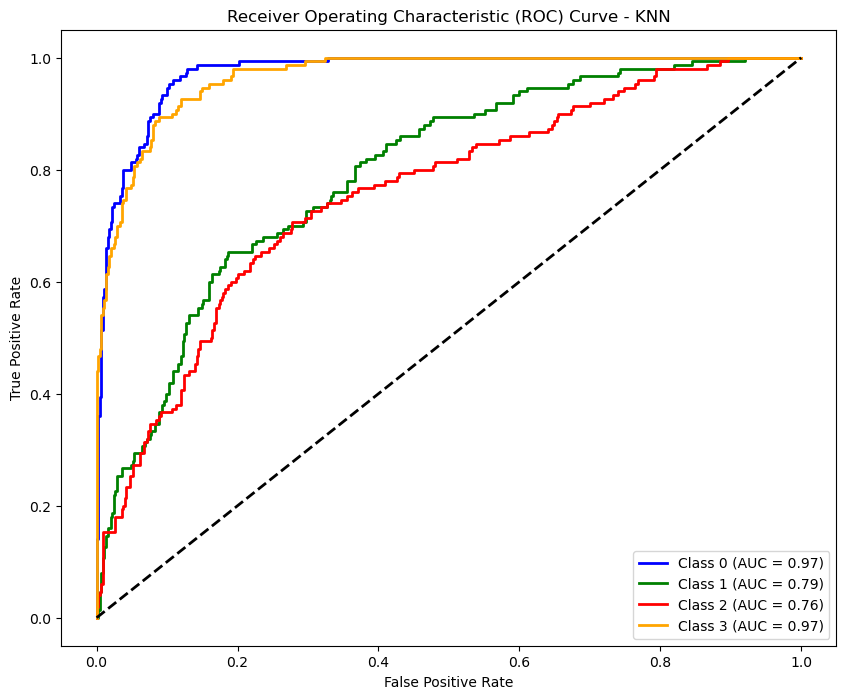

Class 0 AUC: 0.97
Class 1 AUC: 0.79
Class 2 AUC: 0.76
Class 3 AUC: 0.97


In [95]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarize the output labels for multi-class classification
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_knn_prob = best_knn_model.predict_proba(X_test)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_knn_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

colors = ['blue', 'green', 'red', 'orange']
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal (chance line)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()

# Print AUC for each class
for i in range(len(lb.classes_)):
    print(f"Class {i} AUC: {roc_auc[i]:.2f}")



#### Inference Based On Metrics : KNN

The K-Nearest Neighbors (KNN) model was employed to classify mobile phones into four distinct pricing categories: low, medium, high, and very high. After hyperparameter tuning, the best configuration achieved an accuracy of 65.33%, indicating moderate performance for this classification task.

1. Class-Specific Results:

- Classes 0 (low price) and 3 (very high price) had high AUC values (0.97), indicating the model's strong ability to distinguish phones in these categories.
- Classes 1 (medium price) and 2 (high price) had lower AUC values (0.79 and 0.76), suggesting some overlap and difficulty in distinguishing between mid-range pricing tiers.
  
2. Overall Observations:
- The model performs well for extreme pricing categories (low and very high) but struggles with mid-tier classifications due to potentially overlapping features, which is reflected in the slightly lower precision, recall, and F1-scores for these classes.

K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm that classifies data points based on their similarity to nearby points. It works by looking at the "neighbors" (closest points) around a data point and deciding its category based on the majority class among those neighbors. For our mobile phone price classification problem, KNN helps group phones into categories like low, medium, high, or very high price based on their features.

The model is especially good at identifying phones in very distinct price categories, like very cheap or very expensive ones, but it struggles a bit with mid-range categories where features often overlap. While the accuracy of the model (65.33%) shows it's not perfect, it can still be useful as a starting point for helping consumers or retailers understand basic pricing groups. However, to make it more reliable for real-world use, we might need to combine KNN with other methods or improve its precision for mid-range categories.

### Conclusion 

In this study, we explored the effectiveness of machine learning models in predicting mobile phone price categories based on various features such as RAM, battery life, screen size, and more. Several models, including Logistic Regression (LR), Random Forest (RF), XGBoost, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN), were evaluated using performance metrics such as accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrix. The findings emphasize the value of machine learning in price prediction, especially when it comes to providing accurate guidance to consumers and businesses.

Key Findings:

1. Model Performance Overview:
- Support Vector Machine (SVM): Achieved the highest accuracy of 97.5%, with impressive precision, recall, and F1-scores across all categories. It demonstrated near-perfect discrimination between price ranges, making it highly effective for real-time price classification.
- Logistic Regression (LR): Showed excellent performance with 97.67% accuracy and consistent results after feature selection, making it a reliable and interpretable option for price classification.
- Random Forest (RF): Achieved solid performance with an accuracy of 91.17%, demonstrating good ability in handling complex data and distinguishing between different price categories.
- XGBoost: With an accuracy of 94.17%, this model excelled in precision and recall, making it a robust choice for mobile price prediction.
- K-Nearest Neighbors (KNN): Struggled with lower accuracy (65.33%) and had difficulty distinguishing mid-range prices but performed well for extreme categories like low and very high prices.
  
2. Best Model Selection:
- SVM emerged as the best-performing model, demonstrating exceptional accuracy and the ability to effectively classify phones into price categories. Logistic Regression is a strong alternative, particularly for cases where model interpretability is important. XGBoost and Random Forest also proved valuable, offering good performance for real-world applications.
  
3. Real-World Relevance:

In the mobile phone market, accurately predicting price categories is critical for businesses in pricing strategies, inventory management, and consumer guidance. The ability to classify phones into price brackets—low, medium, high, or very high—based on features like battery life, RAM, and screen size allows companies to optimize their offerings and assist customers in making informed decisions. Machine learning models, particularly SVM, offer substantial advantages by accurately predicting price categories and minimizing errors, which is essential in the competitive market.

For e-commerce platforms, retailers, and manufacturers, incorporating such predictive models can improve customer satisfaction by providing clear price segmentation. It can also drive inventory decisions by predicting which price range will be in demand. Additionally, as the smartphone market continues to evolve, integrating predictive analytics into business operations will be crucial for staying ahead of market trends and delivering optimal pricing models.

Final Thoughts:

This study underscores the transformative potential of machine learning in mobile phone price prediction. While SVM emerged as the best model, all evaluated algorithms demonstrated valuable insights into price classification. Implementing these models in real-time applications can revolutionize pricing strategies, enhance consumer experiences, and optimize business operations. As the mobile market becomes increasingly data-driven, the adoption of such predictive models will play a pivotal role in shaping the future of mobile pricing and consumer engagement.













